RESEARCH QUESTION

Can we determine who receives the COVID-19 vaccine first after its development, and if so, who?

The purpose of this notebook is to explore the attributes, particularly age, origin and travel data, of individual case and deaths that have occurred in Canada due to COVID-19.

Sources of data:

1.   https://github.com/ishaberry/Covid19Canada

Citation: Berry I, Soucy J-PR, Tuite A, Fisman D. Open access epidemiologic data and an interactive dashboard to monitor the COVID-19 outbreak in Canada. CMAJ. 2020 Apr 14;192(15): E420. doi: https://doi.org/10.1503/cmaj.75262


There are two datasets to explore:

1.   Individual Case Data (https://github.com/ishaberry/Covid19Canada/blob/master/cases.csv)
2.   Individual Death Data (https://github.com/ishaberry/Covid19Canada/blob/master/mortality.csv)

The codebook for the columns used in these datasets can be found at https://github.com/ishaberry/Covid19Canada/blob/master/codebook.csv



Importing the relevant libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io

The first dataset to examine is the Individual Case Data.

Importing it into Google Colab.

In [ ]:
raw_canada_individual_case_data = pd.read_csv("https://raw.githubusercontent.com/ishaberry/Covid19Canada/master/cases.csv")

In [ ]:
raw_canada_individual_case_data

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
1,2,2,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,NaN,0.0
2,3,1,40-49,Male,Not Reported,BC,Canada,28-01-2020,26-01-2020,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...,"Out of Canada: As of 09/07/2020, BC announced ...",NaN,1.0
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0,NaN,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138546,138547,46393,Not Reported,Not Reported,York,Ontario,Canada,13-09-2020,13-09-2020,Not Reported,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health...,NaN,NaN,0.0
138547,138548,46394,Not Reported,Not Reported,York,Ontario,Canada,13-09-2020,13-09-2020,Not Reported,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health...,NaN,NaN,0.0
138548,138549,46395,Not Reported,Not Reported,York,Ontario,Canada,13-09-2020,13-09-2020,Not Reported,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health...,NaN,NaN,0.0
138549,138550,46396,Not Reported,Not Reported,York,Ontario,Canada,13-09-2020,13-09-2020,Not Reported,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health...,NaN,NaN,0.0


The relevant columns are the columns related to age, origin of case and travel history. Hence, the rest of the columns can be removed.

In [ ]:
raw_canada_individual_case_data.columns

Index(['case_id', 'provincial_case_id', 'age', 'sex', 'health_region',
       'province', 'country', 'date_report', 'report_week', 'travel_yn',
       'travel_history_country', 'locally_acquired', 'case_source',
       'additional_info', 'additional_source', 'method_note'],
      dtype='object')

In [ ]:
canada_individual_case_data = raw_canada_individual_case_data[["case_id", "provincial_case_id", "age", "travel_yn", "travel_history_country", "locally_acquired", "additional_info"]]

In [ ]:
canada_individual_case_data

,case_id,provincial_case_id,age,travel_yn,travel_history_country,locally_acquired,additional_info
0,1,1,50-59,1,China,NaN,NaN
1,2,2,50-59,1,China,NaN,Travel and Close Contact
2,3,1,40-49,1,China,NaN,"Out of Canada: As of 09/07/2020, BC announced ..."
3,4,3,20-29,1,China,NaN,NaN
4,5,2,50-59,0,NaN,Close Contact,The individual had close contact with family v...
...,...,...,...,...,...,...,...
138546,138547,46393,Not Reported,Not Reported,NaN,NaN,NaN
138547,138548,46394,Not Reported,Not Reported,NaN,NaN,NaN
138548,138549,46395,Not Reported,Not Reported,NaN,NaN,NaN
138549,138550,46396,Not Reported,Not Reported,NaN,NaN,NaN


Examining the columns, it shows the age group of each case. It further shows if each case had a travel history from the ``` travel_yn ``` column, where a 1 represents a yes and a 0 represents a no. If a case has travel history, it shows the country where the person had been to in the ``` travel_history_country ``` column. If the case does not have travel history, the cause of case locally is shown in the ``` locally_acquired ``` column. The ``` additional_info ``` column gives additional information about each case. This description can be found in the dataset codebook linked above.

Cleaning the data of NaNs (or missing values) and replacing with string "Not applicable" or an empty string value.

In [ ]:
canada_individual_case_data["travel_history_country"] = canada_individual_case_data["travel_history_country"].fillna("Not applicable")
canada_individual_case_data["locally_acquired"] = canada_individual_case_data["locally_acquired"].fillna("Not applicable")
canada_individual_case_data["additional_info"] = canada_individual_case_data["additional_info"].fillna("")

canada_individual_case_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,case_id,provincial_case_id,age,travel_yn,travel_history_country,locally_acquired,additional_info
0,1,1,50-59,1,China,Not applicable,
1,2,2,50-59,1,China,Not applicable,Travel and Close Contact
2,3,1,40-49,1,China,Not applicable,"Out of Canada: As of 09/07/2020, BC announced ..."
3,4,3,20-29,1,China,Not applicable,
4,5,2,50-59,0,Not applicable,Close Contact,The individual had close contact with family v...
...,...,...,...,...,...,...,...
138546,138547,46393,Not Reported,Not Reported,Not applicable,Not applicable,
138547,138548,46394,Not Reported,Not Reported,Not applicable,Not applicable,
138548,138549,46395,Not Reported,Not Reported,Not applicable,Not applicable,
138549,138550,46396,Not Reported,Not Reported,Not applicable,Not applicable,


Examining unique values in each column.

In [ ]:
canada_individual_case_data.age.unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       'Not Reported', '10-19', '90-99', '<18', '<1', '2', '61', '50',
       '<10', '<20', '20-39', '60-79', '40-59', '100-109', '<19', '>90',
       '65-79', '18-34', '45-64', '35-44', '80+', '0-17', '90+', '45-65',
       '>80', '30-49', '0-9', '18-24', '0-19'], dtype=object)

In [ ]:
canada_individual_case_data.travel_yn.unique()

array(['1', '0', 'Not Reported'], dtype=object)

In [ ]:
canada_individual_case_data.travel_history_country.unique()

array(['China', 'Not applicable', 'Iran', 'Egypt', 'India, Hong Kong',
       'India', 'Italy', 'Grand Princess Cruise Ship', 'United States',
       'France', 'Cruise (Mexico)', 'Germany',
       'Ukraine, Turkey, Netherlands', 'MS Braemar cruise ship',
       'United States, Ireland, United Kingdom', 'Switzerland',
       'Not Reported', 'Austria', 'United States, Caribbean',
       'Dominican Republic', 'Cruise', 'Europe',
       'United States, Costa Rica', 'Spain', 'Philippines',
       'United Kingdom', 'France, United Kingdom', 'Canada',
       'South Korea, Philippines, Japan', 'Mexico',
       'United States, Caribbean Cruise', 'Spain, Portugal', 'Asia',
       'Caribbean', 'Grand Princess Cruise', 'Ecuador', 'Australia',
       'Nigeria, Germany, Canada', 'United States, Overseas', 'Greece',
       'Saint-Martin', 'Costa Rica', 'Barbados', 'Brazil',
       'Japan, United Kingdom, Germany', 'Pakistan, Turkey',
       'United States, Canada', 'Spain, Belgium, Canary Islands',
 

In [ ]:
canada_individual_case_data.locally_acquired.unique()

array(['Not applicable', 'Close Contact', 'Community', 'Close contact',
       'close contact', '1'], dtype=object)

In [ ]:
print("Number of unique values is", len(canada_individual_case_data.additional_info.unique()))   #All these values are unique to each case and highly specific
#canada_individual_case_data.additional_info.unique()

Number of unique values is 688


The ``` age ``` values are not grouped in a way that is mutually exclusive and exhaustive. Thus, creating a function to do group them into such bins.

In [ ]:
len(canada_individual_case_data[canada_individual_case_data.age.isin(['18-34', '45-64', '35-44', '45-65', '18-24', '30-49'])])   #This is the number of rows which incorporate this system of age bins

122

In [ ]:
len(canada_individual_case_data[canada_individual_case_data.age != "Not Reported"])   #This is the total number of rows which have reported ages

6730

It can be seen that the number of rows that use the system of age bins that does not fit into "10n-10n+19" bins is very low compared to the total number of rows which have reported ages. Thus, these rows can be removed for simplicity.

In [ ]:
canada_individual_case_data = canada_individual_case_data[canada_individual_case_data.age.isin(list(set(canada_individual_case_data.age.unique().tolist()) - set(['18-34', '45-64', '35-44', '45-65', '18-24', '30-49'])))]  #Converted lists to set to be able to use set notation to get the difference between the two lists to remove the undesirable age bins
canada_individual_case_data

,case_id,provincial_case_id,age,travel_yn,travel_history_country,locally_acquired,additional_info
0,1,1,50-59,1,China,Not applicable,
1,2,2,50-59,1,China,Not applicable,Travel and Close Contact
2,3,1,40-49,1,China,Not applicable,"Out of Canada: As of 09/07/2020, BC announced ..."
3,4,3,20-29,1,China,Not applicable,
4,5,2,50-59,0,Not applicable,Close Contact,The individual had close contact with family v...
...,...,...,...,...,...,...,...
138546,138547,46393,Not Reported,Not Reported,Not applicable,Not applicable,
138547,138548,46394,Not Reported,Not Reported,Not applicable,Not applicable,
138548,138549,46395,Not Reported,Not Reported,Not applicable,Not applicable,
138549,138550,46396,Not Reported,Not Reported,Not applicable,Not applicable,


In [ ]:
canada_individual_case_data.age.unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       'Not Reported', '10-19', '90-99', '<18', '<1', '2', '61', '50',
       '<10', '<20', '20-39', '60-79', '40-59', '100-109', '<19', '>90',
       '65-79', '80+', '0-17', '90+', '>80', '0-9', '0-19'], dtype=object)

Thus, creating a function that will replace the ``` age ``` with the appropriate bin value.

In [ ]:
def replace_age_bins(row):

  val = row["age"]
  new_val = ""

  if val == "50-59":
    new_val = "40-59"
  elif val == "40-49":
    new_val = "40-59"
  elif val == "20-29":
    new_val = "20-39"
  elif val == "30-39":
    new_val = "20-39"
  elif val == "60-69":
    new_val = "60-79"
  elif val == "80-89":
    new_val = "80+"
  elif val == "70-79":
    new_val = "60-79"
  elif val == "10-19":
    new_val = "0-19"
  elif val == "90-99":
    new_val = "80+"
  elif val == "<18":
    new_val = "0-19"
  elif val == "<1":
    new_val = "0-19"
  elif val == "2":
    new_val = "0-19"
  elif val == "61":
    new_val = "60-79"
  elif val == "50":
    new_val = "40-59"
  elif val == "<10":
    new_val = "0-19"
  elif val == "<20":
    new_val = "0-19"
  elif val == "20-39":
    new_val = "20-39"
  elif val == "60-79":
    new_val = "60-79"
  elif val == "40-59":
    new_val = "40-59"
  elif val == "100-109":
    new_val = "80+"
  elif val == "<19":
    new_val = "0-19"
  elif val == ">90":
    new_val = "80+"
  elif val == "65-79":
    new_val = "60-79"
  elif val == "80+":
    new_val = "80+"
  elif val == "0-17":
    new_val = "0-19"
  elif val == "90+":
    new_val = "80+"
  elif val == ">80":
    new_val = "80+"
  elif val == "0-9":
    new_val = "0-19"
  elif val == "0-19":
    new_val = "0-19"
  elif val == "Not Reported":
    new_val = "Not Reported"
  
  #This is not the best way to do this operation, however, it does the task efficiently enough

  return new_val

In [ ]:
canada_individual_case_data["age"] = canada_individual_case_data.apply(replace_age_bins,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
canada_individual_case_data.age.unique()

array(['40-59', '20-39', '60-79', '80+', 'Not Reported', '0-19'],
      dtype=object)

Now that the age groups are appropriate and usable, a bar graph can be plot showing the number of cases with travel history versus the number of cases without travel history based on age group.

In [ ]:
canada_individual_case_data = canada_individual_case_data.reset_index() #reset indices due to removal of rows

Creating a new DataFrame that we can directly plot from without performing operations while plotting.

In [ ]:
without_travel_history = [len(canada_individual_case_data[canada_individual_case_data.age == "0-19"][canada_individual_case_data.travel_yn == "0"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "20-39"][canada_individual_case_data.travel_yn == "0"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "40-59"][canada_individual_case_data.travel_yn == "0"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "60-79"][canada_individual_case_data.travel_yn == "0"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "80+"][canada_individual_case_data.travel_yn == "0"]),
                          ]

with_travel_history = [len(canada_individual_case_data[canada_individual_case_data.age == "0-19"][canada_individual_case_data.travel_yn == "1"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "20-39"][canada_individual_case_data.travel_yn == "1"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "40-59"][canada_individual_case_data.travel_yn == "1"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "60-79"][canada_individual_case_data.travel_yn == "1"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "80+"][canada_individual_case_data.travel_yn == "1"])
                       ]

case_travel_history_bar_plot_df_index = ["0-19", "20-39", "40-59", "60-79", "80+"]

case_travel_history_bar_plot_df = pd.DataFrame({"With Travel History": with_travel_history, "Without Travel History": without_travel_history}, index=case_travel_history_bar_plot_df_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to ma

In [ ]:
sns.set()
sns.set(context="notebook", style="darkgrid", palette="deep", font_scale=1)

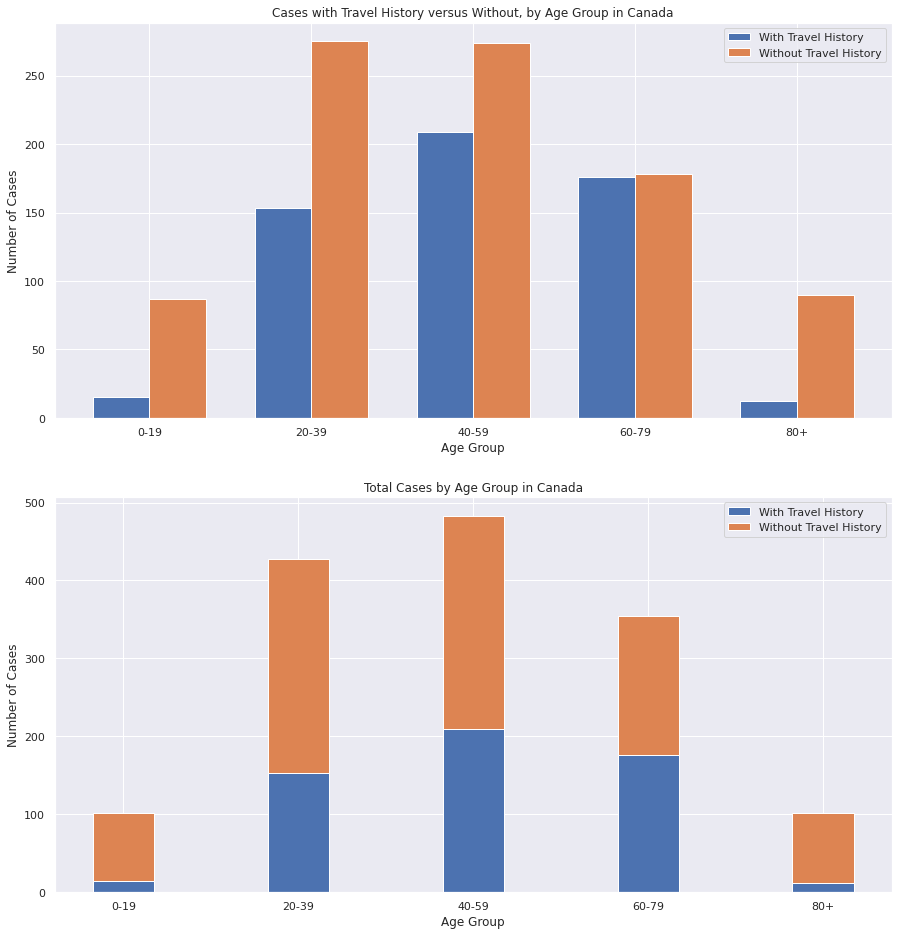

In [ ]:
figure = plt.figure(figsize=(15, 16))

bar_plot_grouped = figure.add_subplot(211)
bar_plot_stacked = figure.add_subplot(212)

x = np.arange(len(case_travel_history_bar_plot_df_index))
width = 0.35

rects1 = bar_plot_grouped.bar(x - width/2, with_travel_history, width, label="With Travel History")
rects2 = bar_plot_grouped.bar(x + width/2, without_travel_history, width, label="Without Travel History")

bar_plot_grouped.set_title("Cases with Travel History versus Without, by Age Group in Canada")
bar_plot_grouped.set_xlabel("Age Group")
bar_plot_grouped.set_ylabel("Number of Cases")
bar_plot_grouped.set_xticks(x)
bar_plot_grouped.set_xticklabels(case_travel_history_bar_plot_df_index)
bar_plot_grouped.legend()


rects3 = bar_plot_stacked.bar(x, with_travel_history, width, label="With Travel History")
rects4 = bar_plot_stacked.bar(x, without_travel_history, width, bottom=with_travel_history, label="Without Travel History")

bar_plot_stacked.set_title("Total Cases by Age Group in Canada")
bar_plot_stacked.set_xlabel("Age Group")
bar_plot_stacked.set_ylabel("Number of Cases")
bar_plot_stacked.set_xticks(x)
bar_plot_stacked.set_xticklabels(case_travel_history_bar_plot_df_index)
bar_plot_stacked.legend()

plt.show()

The first graph suggests that adults in the age group of 20-59 travel outside the local area and catch COVID-19 much more frequently than persons aged 80 above and 0-19 who do not travel as much. A similar trend shows for cases without travel history.

The second graph suggests that adults aged 20-79, particularly aged 20-59, are much more susceptible to catching COVID-19 than other age groups. 

Examining the other columns that are ``` travel_history_country ``` and ``` locally_acquired ```.

In [ ]:
canada_individual_case_data["travel_history_country"].unique()

array(['China', 'Not applicable', 'Iran', 'Egypt', 'India, Hong Kong',
       'India', 'Italy', 'Grand Princess Cruise Ship', 'United States',
       'France', 'Cruise (Mexico)', 'Germany',
       'Ukraine, Turkey, Netherlands', 'MS Braemar cruise ship',
       'United States, Ireland, United Kingdom', 'Switzerland',
       'Not Reported', 'Austria', 'United States, Caribbean',
       'Dominican Republic', 'Cruise', 'Europe',
       'United States, Costa Rica', 'Spain', 'Philippines',
       'United Kingdom', 'France, United Kingdom', 'Canada',
       'South Korea, Philippines, Japan', 'Mexico',
       'United States, Caribbean Cruise', 'Spain, Portugal', 'Asia',
       'Caribbean', 'Grand Princess Cruise', 'Ecuador', 'Australia',
       'Nigeria, Germany, Canada', 'United States, Overseas', 'Greece',
       'Saint-Martin', 'Costa Rica', 'Barbados', 'Brazil',
       'Japan, United Kingdom, Germany', 'Pakistan, Turkey',
       'United States, Canada', 'Spain, Belgium, Canary Islands',
 

In [ ]:
canada_individual_case_data["locally_acquired"].unique()

array(['Not applicable', 'Close Contact', 'Community', 'Close contact',
       'close contact', '1'], dtype=object)

There are three different string values for "Close Contact" for column ``` locally_acquired ```. This can be cleaned.

In [ ]:
def clean_locally_acquired_value(row):
  if row["locally_acquired"] == "Close contact" or row["locally_acquired"] == "close contact":
    return "Close Contact"
  else:
    return row["locally_acquired"]
  endif

canada_individual_case_data["locally_acquired"] = canada_individual_case_data.apply(clean_locally_acquired_value, axis=1)

In [ ]:
canada_individual_case_data["locally_acquired"].unique()

array(['Not applicable', 'Close Contact', 'Community', '1'], dtype=object)

It is difficult to understand what a value of "1" means for column ``` locally_acquired ```. It is not explained in the codebook for the dataset.

In [ ]:
print(len(canada_individual_case_data[canada_individual_case_data.locally_acquired == "Close Contact"]))
print(len(canada_individual_case_data[canada_individual_case_data.locally_acquired == "Community"]))
print(len(canada_individual_case_data[canada_individual_case_data.locally_acquired == "1"]))

685
387
1


Since, a value of "1" for ``` locally_acquired ``` occurs only once, it can be removed for not being significant or explanatory.

In [ ]:
canada_individual_case_data = canada_individual_case_data[canada_individual_case_data.locally_acquired != "1"]
canada_individual_case_data["locally_acquired"].unique()

array(['Not applicable', 'Close Contact', 'Community'], dtype=object)

Plotting ``` locally_acquired ``` by ``` age ```.

In [ ]:
canada_individual_case_data = canada_individual_case_data.reset_index() #reset indices due to removal of rows

Creating a new DataFrame that we can directly plot from without performing operations while plotting.

In [ ]:
close_contact_acquired = [len(canada_individual_case_data[canada_individual_case_data.age == "0-19"][canada_individual_case_data.locally_acquired == "Close Contact"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "20-39"][canada_individual_case_data.locally_acquired == "Close Contact"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "40-59"][canada_individual_case_data.locally_acquired == "Close Contact"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "60-79"][canada_individual_case_data.locally_acquired == "Close Contact"]),
                          len(canada_individual_case_data[canada_individual_case_data.age == "80+"][canada_individual_case_data.locally_acquired == "Close Contact"]),
                          ]

community_acquired = [len(canada_individual_case_data[canada_individual_case_data.age == "0-19"][canada_individual_case_data.locally_acquired == "Community"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "20-39"][canada_individual_case_data.locally_acquired == "Community"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "40-59"][canada_individual_case_data.locally_acquired == "Community"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "60-79"][canada_individual_case_data.locally_acquired == "Community"]),
                       len(canada_individual_case_data[canada_individual_case_data.age == "80+"][canada_individual_case_data.locally_acquired == "Community"])
                       ]

locally_acquired_bar_plot_df_index = ["0-19", "20-39", "40-59", "60-79", "80+"]

locally_acquired_bar_plot_df = pd.DataFrame({"Acquired through Close Contact": close_contact_acquired, "Acquired through Community": community_acquired}, index=locally_acquired_bar_plot_df_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to ma

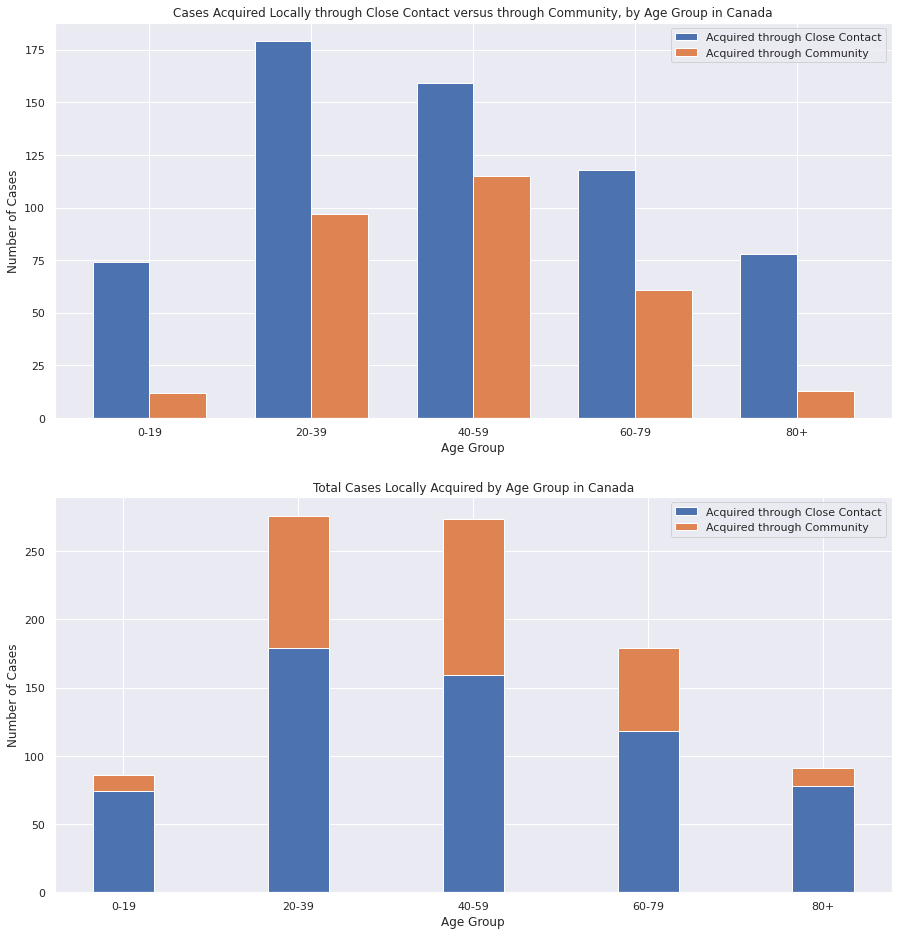

In [ ]:
figure = plt.figure(figsize=(15, 16))

bar_plot_grouped = figure.add_subplot(211)
bar_plot_stacked = figure.add_subplot(212)

x = np.arange(len(locally_acquired_bar_plot_df_index))
width = 0.35

rects1 = bar_plot_grouped.bar(x - width/2, close_contact_acquired, width, label="Acquired through Close Contact")
rects2 = bar_plot_grouped.bar(x + width/2, community_acquired, width, label="Acquired through Community")

bar_plot_grouped.set_title("Cases Acquired Locally through Close Contact versus through Community, by Age Group in Canada")
bar_plot_grouped.set_xlabel("Age Group")
bar_plot_grouped.set_ylabel("Number of Cases")
bar_plot_grouped.set_xticks(x)
bar_plot_grouped.set_xticklabels(locally_acquired_bar_plot_df_index)
bar_plot_grouped.legend()


rects3 = bar_plot_stacked.bar(x, close_contact_acquired, width, label="Acquired through Close Contact")
rects4 = bar_plot_stacked.bar(x, community_acquired, width, bottom=close_contact_acquired, label="Acquired through Community")

bar_plot_stacked.set_title("Total Cases Locally Acquired by Age Group in Canada")
bar_plot_stacked.set_xlabel("Age Group")
bar_plot_stacked.set_ylabel("Number of Cases")
bar_plot_stacked.set_xticks(x)
bar_plot_stacked.set_xticklabels(locally_acquired_bar_plot_df_index)
bar_plot_stacked.legend()

plt.show()

“Community” means that that person acquired COVID-19 by unknown causes. It appears that “Close Contact” is the main way that COVID-19 is acquired locally, compared to “Community”. 

Also, if we consider figures for “Close Contact”, we can see that it is highest in age group 20-59, particularly 20-39. Even for “Community”, it follows a similar trend except the highest is the age group 40-59. This supports the argument that age group 20-59 is the main cause of spread of COVID-19 and should be vaccinated first to help discourage the further spread of COVID-19. 

The second dataset to examine is the Individual Death Data.

Importing the dataset into Google Colab.

In [ ]:
raw_canada_individual_death_data = pd.read_csv("https://raw.githubusercontent.com/ishaberry/Covid19Canada/master/mortality.csv")

In [ ]:
raw_canada_individual_death_data

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,11-03-2020,https://www.nationalobserver.com/2020/03/17/ne...,Was being treated at Royal Victoria Regional H...,NaN
2,3,2,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
3,4,3,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
4,5,4,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9208,9209,5778,NaN,Not Reported,Not Reported,Laurentides,Quebec,Canada,12-09-2020,https://www.quebec.ca/en/health/health-issues/...,NaN,NaN
9209,9210,5779,NaN,Not Reported,Not Reported,Montérégie,Quebec,Canada,12-09-2020,https://www.quebec.ca/en/health/health-issues/...,NaN,NaN
9210,9211,5780,NaN,Not Reported,Not Reported,Laurentides,Quebec,Canada,13-09-2020,https://www.quebec.ca/en/health/health-issues/...,13-09-2020: Montréal replaced with Laurentides...,NaN
9211,9212,2856,NaN,Not Reported,Not Reported,Toronto,Ontario,Canada,12-09-2020,https://twitter.com/TOPublicHealth,NaN,NaN


The relevant columns are the columns related to age. The cause of death would be COVID-19 for all these cases.

In [ ]:
raw_canada_individual_death_data.columns

Index(['death_id', 'province_death_id', 'case_id', 'age', 'sex',
       'health_region', 'province', 'country', 'date_death_report',
       'death_source', 'additional_info', 'additional_source'],
      dtype='object')

In [ ]:
canada_individual_death_data = raw_canada_individual_death_data[["death_id", "province_death_id", "case_id", "age", "additional_info"]]

In [ ]:
canada_individual_death_data

,death_id,province_death_id,case_id,age,additional_info
0,1,1,60.0,80-89,Lynn Valley Resident
1,2,1,477.0,70-79,Was being treated at Royal Victoria Regional H...
2,3,2,NaN,Not Reported,Lynn Valley Resident
3,4,3,NaN,Not Reported,Lynn Valley Resident
4,5,4,NaN,Not Reported,Lynn Valley Resident
...,...,...,...,...,...
9208,9209,5778,NaN,Not Reported,NaN
9209,9210,5779,NaN,Not Reported,NaN
9210,9211,5780,NaN,Not Reported,13-09-2020: Montréal replaced with Laurentides...
9211,9212,2856,NaN,Not Reported,NaN


In [ ]:
print("The number of unique values is", len(canada_individual_death_data["additional_info"].unique()))
#canada_individual_death_data["additional_info"].unique()

The number of unique values is 274


Showing each unique value for ``` age ``` column.

In [ ]:
canada_individual_death_data["age"].unique()

array(['80-89', '70-79', 'Not Reported', '82', '50-59', '60-69', '90-99',
       '>70', '>80', '40-49', '83', '78', '30-39', '100-109', '92', '>50',
       '>65', '94', '20-29', '79', '61', '85', '80', '91', '104', '88',
       '65', '93', '90', '59', '84', '89', '87', '55', '44', '76', '70',
       '62', '81', '20-39', '97', '67', '95', '96', '86', '24', '64',
       '100+', '80+', '19'], dtype=object)

Creating age bins the same as before. Here, the problematic values are ">70", ">65" and ">50".

In [ ]:
print(len(canada_individual_death_data[canada_individual_death_data.age == ">70"]))
print(len(canada_individual_death_data[canada_individual_death_data.age == ">65"]))
print(len(canada_individual_death_data[canada_individual_death_data.age == ">50"]))

49
6
2


Thus, these values encompass 57 rows out of 9194. Thus, they can be removed without it being significant.

In [ ]:
canada_individual_death_data = canada_individual_death_data[canada_individual_death_data.age != ">70"]
canada_individual_death_data = canada_individual_death_data[canada_individual_death_data.age != ">65"]
canada_individual_death_data = canada_individual_death_data[canada_individual_death_data.age != ">50"]

In [ ]:
canada_individual_death_data["age"].unique()

array(['80-89', '70-79', 'Not Reported', '82', '50-59', '60-69', '90-99',
       '>80', '40-49', '83', '78', '30-39', '100-109', '92', '94',
       '20-29', '79', '61', '85', '80', '91', '104', '88', '65', '93',
       '90', '59', '84', '89', '87', '55', '44', '76', '70', '62', '81',
       '20-39', '97', '67', '95', '96', '86', '24', '64', '100+', '80+',
       '19'], dtype=object)

In [ ]:
def replace_age_bins_death_data(row):

  val = row["age"]
  new_val = ""

  if val == "50-59":
    new_val = "40-59"
  elif val == "40-49":
    new_val = "40-59"
  elif val == "20-29":
    new_val = "20-39"
  elif val == "30-39":
    new_val = "20-39"
  elif val == "60-69":
    new_val = "60-79"
  elif val == "80-89":
    new_val = "80+"
  elif val == "70-79":
    new_val = "60-79"
  elif val == "90-99":
    new_val = "80+"
  elif val == "20-39":
    new_val = "20-39"
  elif val == "100-109":
    new_val = "80+"
  elif val == ">80":
    new_val = "80+"
  elif val == "80+":
    new_val = "80+"
  elif val == "Not Reported":
    new_val = "Not Reported"
  
  elif val.isnumeric() == True:
    val_num = int(val)
    if val_num >= 0 & val_num < 20:
      new_val = "0-19"
    elif val_num >= 20 & val_num < 40:
      new_val = "20-39"
    elif val_num >= 40 & val_num < 60:
      new_val = "40-59"
    elif val_num >= 60 & val_num < 80:
      new_val = "60-79"
    elif val_num >= 80:
      new_val = "80+"
  
  #This is not the best way to do this operation, however, it does the task efficiently enough

  return new_val

In [ ]:
canada_individual_death_data["age"] = canada_individual_death_data.apply(replace_age_bins_death_data,axis=1)

In [ ]:
canada_individual_death_data["age"].unique()

array(['80+', '60-79', 'Not Reported', '0-19', '40-59', '20-39', ''],
      dtype=object)

Now we have the age groups sorted, a graph can be made.

The only plot that is beneficial to explore based on the available columns is a bar graph showing the number of deaths by age group.

In [ ]:
canada_deaths_by_age_group_dict = {"0-19": len(canada_individual_death_data[canada_individual_death_data.age == "0-19"]),
                                   "20-39": len(canada_individual_death_data[canada_individual_death_data.age == "20-39"]),
                                   "40-59": len(canada_individual_death_data[canada_individual_death_data.age == "40-59"]),
                                   "60-79": len(canada_individual_death_data[canada_individual_death_data.age == "60-79"]),
                                   "80+": len(canada_individual_death_data[canada_individual_death_data.age == "80+"])}

canada_deaths_by_age_group_dict

{'0-19': 52, '20-39': 6, '40-59': 17, '60-79': 113, '80+': 189}

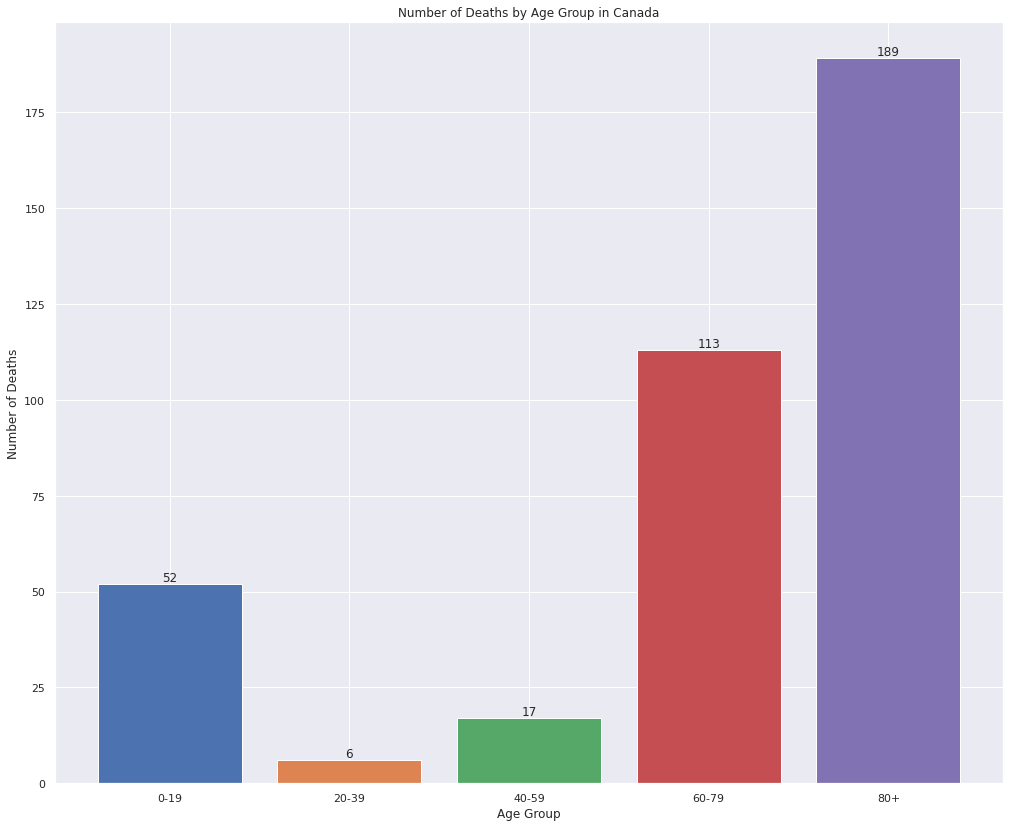

In [ ]:
#figure = plt.figure(figsize=(15, 16))

#bar_plot = figure.add_subplot(111)

fig, ax = plt.subplots(figsize=(17, 14))

rects = [None] * len(canada_deaths_by_age_group_dict)
i = 0

for key in canada_deaths_by_age_group_dict:
  rects[i] = ax.bar(x=key, height=canada_deaths_by_age_group_dict[key])
  i += 1

ax.set_title("Number of Deaths by Age Group in Canada")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Deaths")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

for rect in rects:
  autolabel(rect)

plt.show()

Thus, people aged 60 and over have a much higher chance of death due to COVID-19 than people aged 20 to 59. Children and teenagers however seem to have a significantly high death rate. 

This supports the argument that the older population are at the largest risk and thus should be vaccinate first. It also suggests that we might want to consider vaccinating children and teenagers as a priority later down the line. This point about children and teenagers would need further investigation.

Compiling the results for all the datasets analyzed in this notebook, the following inferences can be made: 

*   Adults in the age group of 20 to 79 travel outside the local area and catch COVID-19 much more frequently than persons aged 80 above and 0 to 19 who do not travel as much. 

*   Adults aged 20 to 59 are the main spreaders of COVID-19 for locally acquired cases. 

*   Adults aged 60 and over, particularly 80 above, have a much higher chance of death due to COVID-19 than people aged 20 to 59. 

*   Children and teenagers seem to have a concerning significantly high death rate.

The first two points here contribute to the argument that the younger population aged 20 to 59 should be vaccinated first in an effort to curb their significantly major transmission of the virus.

The third point contributes to the argument that the older population aged 60 above should be prioritized for vaccination on account of their higher risk of death.